In [8]:
import emcee
import matplotlib.pyplot as plt
import numpy as np
import pylcurve.mcmc_utils as m
import corner as triangle
import matplotlib
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 12
ndim = 14
nameList = np.array([r'$T_{1}$', r'$T_{2}$', r'$M_{1}$', r'$M_{2}$', r'$i$', r'$R_{1}$', r'$R_{2}$', r'$(T_{0}-57460.651)\times10^{9}$',
                     r'$(P-0.09986526)\times10^{9}$',r'$\omega_{pulse}$', r'$q_{pulse}$', r'$T_{pulse}$', r'$A_{pulse}$','Log(likelihood)'])
chain = m.readchain('42000_run/chain.txt')

In [3]:
print(chain[0,0,7])

57460.65100884674


In [94]:
chain[:,:,8] = (chain[:,:,8] - 0.09986526) * 10**9
chain[:,:,7] = (chain[:,:,7] - 57460.651) * 10**5
chain[:,:,12] = chain[:,:,12] * 10**8
# (T-57460.651)e5
# (P−0.09986526)e9

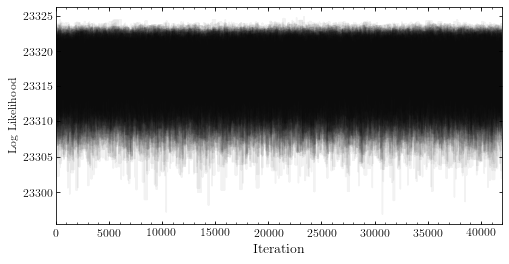

In [9]:
fig, ax = plt.subplots(figsize=(8,4))
for i in range(50):
    ax.plot(np.linspace(1,42000,42000),chain[i,:,13], color='k',alpha=0.05,rasterized=True)
ax.set_xlim([0,42000])

majorLocatorx = MultipleLocator(5000)
minorLocatorx = MultipleLocator(1000)
# majorLocatory = MultipleLocator(0.5)
# minorLocatory = MultipleLocator(0.1)

ax.xaxis.set_major_locator(majorLocatorx)
# ax.yaxis.set_major_locator(majorLocatory)

ax.xaxis.set_minor_locator(minorLocatorx)
# ax.yaxis.set_minor_locator(minorLocatory)
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.set_ylabel('Log Likelihood')
ax.set_xlabel('Iteration',fontsize=14)
plt.show()
fig.savefig('Likelihood.pdf',bbox_to_inches='tight')

In [95]:
fig, ax = plt.subplots(7,2,figsize=(15,15), sharex=True)
ax = ax.ravel()
n = 0
for name in nameList:
    for i in range(50):
        ax[n].plot(np.linspace(1,42000,42000),chain[i,:,n], color='k',alpha=0.05,rasterized=True)
    ax[n].set_ylabel(name)
    ax[n].set_xlim([0,42000])
    n+=1
# ax.set_xlabel('Iteration')
ax[10].set_ylim([-4,110])
ax[12].set_xlabel('Iteration',fontsize=14)
ax[13].set_xlabel('Iteration',fontsize=14)
plt.subplots_adjust(hspace=0)
plt.show()
fig.savefig('walkers.pdf',bbox_to_inches='tight')

OSError: [Errno 12] Cannot allocate memory

<Figure size 1080x1080 with 14 Axes>

OSError: [Errno 12] Cannot allocate memory